## EDA on Police Training and Department Policy

- Compile information on police training and department policy (such as use of body cameras) across the Washington post dataset and BJS police academy datasets

- Perform preliminary EDA on the relationship between training/policy and police violence in different geographic regions

Washington Post dataset has info on body_camera usage of police officers during fatal incidents

In [1]:
# import packages 
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

## Part 1: Body Camera Usage in the Washington Post Dataset

In [2]:
# load Washington Post dataset
df = pd.read_csv('data/fatal-police-shootings-data.csv')

In [3]:
# display head to see revelant fields
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [4]:
# look at in what percent of incidencets the police officers had body cameras
print(f'The police officers wore body cameras in {np.mean((df.body_camera==True)*1)*100:.2f}% \
of the fatal police shooting incidents in this dataset.')

The police officers wore body cameras in 11.99% of the fatal police shooting incidents in this dataset.


In [186]:
# how does body cam usage vary with geographic location (state level)
# create a new df named state_bodycam where for each state, we have total number of incidents and body cam usage
state_bodycam=df.groupby('state').size().to_frame(name='total')

body_cam_used=dict()
for this_state in df.state.unique():
    body_cam_used[this_state]=sum(df.loc[df.groupby('state').groups[this_state],'body_camera']==True)

state_bodycam['body_cam_used']=pd.Series(body_cam_used) # initialize empty column

# create new column of percent body cam used
state_bodycam['percent_body_cam_used']=100*state_bodycam['body_cam_used']/state_bodycam['total']


AttributeError: 'AxesSubplot' object has no attribute 'set_ytickslabel'

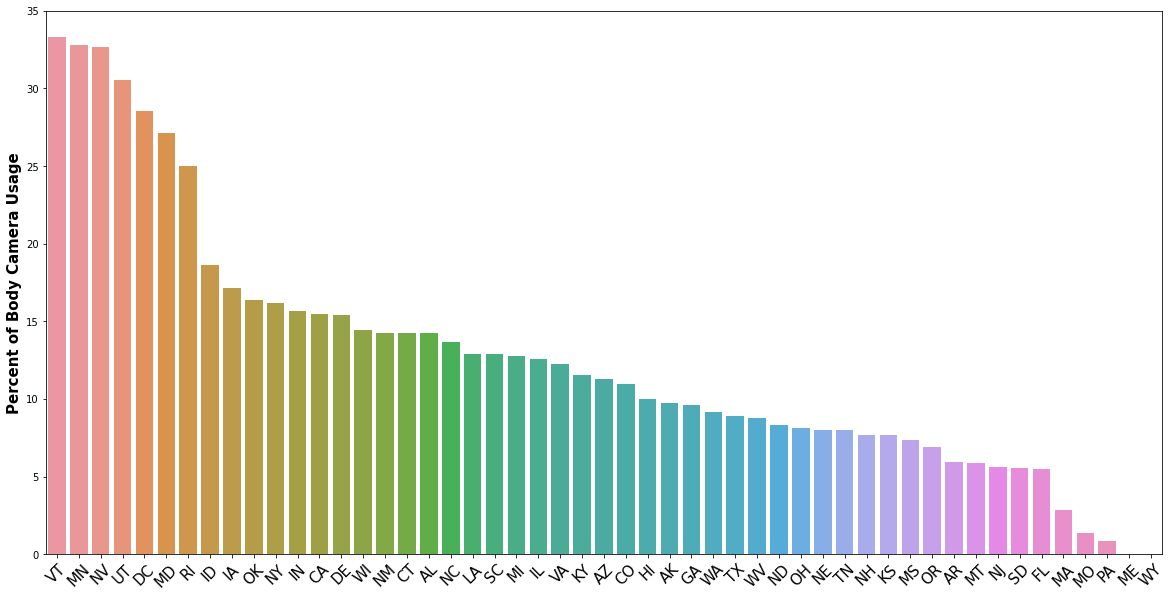

In [212]:
# display sorted bar graph of percent_body_cam_used in descending order of states
fig,ax=plt.subplots(figsize=(20,10))
order = state_bodycam['percent_body_cam_used'].sort_values(ascending=False).index
sns.barplot(x=state_bodycam.index,y=state_bodycam['percent_body_cam_used'], order=order, ax=ax)
ax.set_xticklabels(g.get_xticklabels(), rotation=45,fontsize=15);
ax.set_xlabel('')
ax.set_ylabel('Percent of Body Camera Usage',fontweight='bold',fontsize=15)
ax.tick_params(axis='y', labelsize=12_)
ax.set_title('Body Camera Usage in Fatal Shootings Across States',fontweight='bold',fontsize=15);

In [69]:
# are there trends with body cam usage in rural/suburban/urban regions?
# use present longitude/latitude information to pull out whether a place is rural/suburban/urban regions?


array([], shape=(0, 9), dtype=object)

In [ ]:
# how does body cam usage relate to the crime rate of the region?


## Part 2: Find Information on Police Department Policy on Usage of Body Camera

In [ ]:
# find a relevant dataset


## Part 3: 